$\centerline{Jakub Rękas, Kacper Szot}$

# Biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.special as sps

- `numpy` - biblioteka wykorzystana to obliczeń oraz dostarczająca wartość $\pi$
- `matplotlib.pyplot` - biblioteka służąca do rysowania wykresów
- `scipy.integrate` - biblioteka zawierjąca funkcje `trapezoid` oraz `simpson`, które implementują metodę trapezów oraz metodę simpsona. Dodatkowo wykorzystana została funkcja `quad_vec` do kwadratur adaptacyjnych
- `scipy.special` - wykorzystana została funkcja `legendre_roots`, która zwraca zadaną ilość punktów Legendre'a wraz z ich wagami, co jest wykorzystane w liczeniu całki metodą kwadratury Gaussa.

# Zadanie 1

Zadanie polega na obliczeniu całki  
$$\int_{0}^{1}\frac{4}{1+x^2}dx$$
za pomocą adaptacyjnej metody trapezów oraz kwadratury Gaussa - Kronroda. Otrzymane wyniki należy porównać z wynikiem właściwym, który wynosi $\pi$

In [2]:
def f(x):
    return 4/(1+x*x)

Całkowana funkcja

## Adaptacyjna metoda trapezów

In [3]:
trapz_eval = []
ad_trapz_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="trapezoid", full_output=True)
    trapz_eval.append(info.neval)
    ad_trapz_error.append((abs(np.pi - res) / np.pi) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 3.1311764705882354
Result for tolerance 10^-1: 3.1311764705882354
Result for tolerance 10^-2: 3.1407242608300634
Result for tolerance 10^-3: 3.1415069435393934
Result for tolerance 10^-4: 3.1415798961510997
Result for tolerance 10^-5: 3.141590619697973
Result for tolerance 10^-6: 3.1415925671299707
Result for tolerance 10^-7: 3.141592640894816
Result for tolerance 10^-8: 3.141592651568019
Result for tolerance 10^-9: 3.141592653430405
Result for tolerance 10^-10: 3.1415926534305383
Result for tolerance 10^-11: 3.1415926534305383
Result for tolerance 10^-12: 3.1415926534305383
Result for tolerance 10^-13: 3.1415926534305383
Result for tolerance 10^-14: 3.1415926534305383


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (15 punktów)

In [4]:
gk15_eval = []
gk15_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk15", full_output=True)
    gk15_eval.append(info.neval)
    gk15_error.append((abs(np.pi - res) / np.pi) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 3.141592653589793
Result for tolerance 10^-1: 3.141592653589793
Result for tolerance 10^-2: 3.141592653589793
Result for tolerance 10^-3: 3.141592653589793
Result for tolerance 10^-4: 3.141592653589793
Result for tolerance 10^-5: 3.141592653589793
Result for tolerance 10^-6: 3.141592653589793
Result for tolerance 10^-7: 3.141592653589793
Result for tolerance 10^-8: 3.141592653589793
Result for tolerance 10^-9: 3.141592653589793
Result for tolerance 10^-10: 3.141592653589793
Result for tolerance 10^-11: 3.141592653589793
Result for tolerance 10^-12: 3.141592653589793
Result for tolerance 10^-13: 3.141592653589793
Result for tolerance 10^-14: 3.141592653589793


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (21 punktów)

In [5]:
gk21_eval = []
gk21_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk21", full_output=True)
    gk21_eval.append(info.neval)
    gk21_error.append((abs(np.pi - res) / np.pi) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 3.141592653589793
Result for tolerance 10^-1: 3.141592653589793
Result for tolerance 10^-2: 3.141592653589793
Result for tolerance 10^-3: 3.141592653589793
Result for tolerance 10^-4: 3.141592653589793
Result for tolerance 10^-5: 3.141592653589793
Result for tolerance 10^-6: 3.141592653589793
Result for tolerance 10^-7: 3.141592653589793
Result for tolerance 10^-8: 3.141592653589793
Result for tolerance 10^-9: 3.141592653589793
Result for tolerance 10^-10: 3.141592653589793
Result for tolerance 10^-11: 3.141592653589793
Result for tolerance 10^-12: 3.141592653589793
Result for tolerance 10^-13: 3.141592653589793
Result for tolerance 10^-14: 3.141592653589793


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

Tablice `trapz_eval`, `gk15_eval` i `gk21_eval` zawierają ilość ewaluacji funkcji dla każdej z metod obliczeń dla każdego $i$. Tablice `ad_trapz_error`, `gk15_error` i `gk21_error` zawierają względne błędy obliczeń.

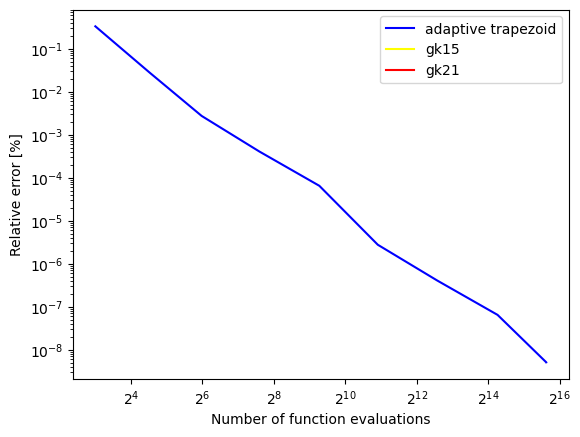

In [6]:
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="blue")
plt.plot(gk15_eval, gk15_error, label="gk15", color="yellow")
plt.plot(gk21_eval, gk21_error, label="gk21", color="red")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 1** - wykres błędu względnego dla trzech metod całkowania w zależności od ilości ewaluacji funkcji. Brak linii dla metody Gaussa - Kronroda oznacza, że dokładność obliczeń jest wystarczająca aby wartość całki była identyczna ze stałą `numpy.pi`, która jest wykorzystana jako wartość referencyjna

## Powtórzenie obliczeń z Laboratorium 6

In [7]:
def midpoint(x, y):
    dx = x[1] - x[0]
    return sum([y[i] * dx for i in range(len(y))])

In [8]:
# do not run unless completely necessary
midpoint_error = []
trapz_error = []
simpson_error = []
for m in range(1, 26):
    base = np.linspace(start=0, stop=1, num=2**m+1)
    xs = np.array([(base[i] + base[i-1])/2 for i in range(1, len(base))])
    ys = f(xs)
    bys = f(base)
    midpoint_error.append((abs(midpoint(xs, ys) - np.pi) / np.pi) * 100)
    trapz_error.append((abs(spi.trapezoid(x=base, y=bys) - np.pi) / np.pi) * 100)
    simpson_error.append((abs(spi.simpson(x=base, y=bys) - np.pi) / np.pi) * 100)

In [9]:
def gauss_quad(f, xs, ws):
    t = lambda x: 0.5*x + 0.5
    res = 0
    for x, w in zip(xs, ws):
        res += f(t(x)) * w
    return 0.5*res

In [10]:
error = []
for n in range(1, 513):
    xs, ws = sps.roots_legendre(n)
    error.append((abs(gauss_quad(f, xs, ws) - np.pi) / np.pi) * 100)

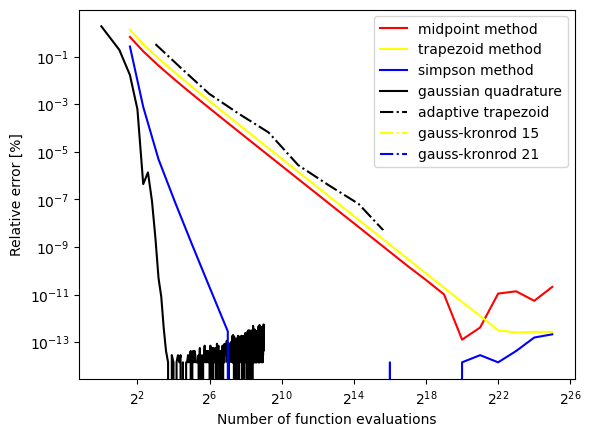

In [11]:
nodes = 1 + 2**np.array([i for i in range(1, 26)])
plt.plot(nodes, midpoint_error, label="midpoint method", color="red")
plt.plot(nodes, trapz_error, label="trapezoid method", color="yellow")
plt.plot(nodes, simpson_error, label="simpson method", color="blue", zorder=3)
plt.plot(range(1, 513), error, label="gaussian quadrature", color="black")
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="black", linestyle="-.")
plt.plot(gk15_eval, gk15_error, label="gauss-kronrod 15", color="yellow", linestyle="-.")
plt.plot(gk21_eval, gk21_error, label="gauss-kronrod 21", color="blue", linestyle="-.")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 2** - wykres wspólny dla metod z Laboratorium 6 oraz Laboratorium 7

# Zadanie 2a

Zadanie polega na obliczeniu całki  
$$\int_{0}^{1}\sqrt{x}\ln{x}dx$$
za pomocą adaptacyjnej metody trapezów oraz kwadratury Gaussa - Kronroda. Otrzymane wyniki należy porównać z wynikiem właściwym, który wynosi $-\frac{4}{9}$

In [12]:
def f(x):
    if x <= 0:
        return 0
    return np.sqrt(x) * np.log(x)

REF = -4/9

- `f` - $f(x)$ - całkowana funkcja
- `REF` - wartość referencyjna $-\frac{4}{9}$

Obliczenia wykonywane są identycznie jak w zadaniu 1

## Adaptacyjna metoda trapezów

In [13]:
trapz_eval = []
ad_trapz_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="trapezoid", full_output=True)
    trapz_eval.append(info.neval)
    ad_trapz_error.append((abs(REF - res) / -REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: -0.35810405881270413
Result for tolerance 10^-1: -0.43746727204503183
Result for tolerance 10^-2: -0.44384951477757767
Result for tolerance 10^-3: -0.44438737482863355
Result for tolerance 10^-4: -0.4444389002250104
Result for tolerance 10^-5: -0.44444388796760464
Result for tolerance 10^-6: -0.44444438889599885
Result for tolerance 10^-7: -0.44444443888739216
Result for tolerance 10^-8: -0.4444444437898762
Result for tolerance 10^-9: -0.44444444379052334
Result for tolerance 10^-10: -0.44444444379078196
Result for tolerance 10^-11: -0.44444444379078196
Result for tolerance 10^-12: -0.44444444379078196
Result for tolerance 10^-13: -0.44444444379078196
Result for tolerance 10^-14: -0.44444444379078196


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (15 punktów)

In [14]:
gk15_eval = []
gk15_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk15", full_output=True)
    gk15_eval.append(info.neval)
    gk15_error.append((abs(REF - res) / -REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: -0.4444809071568363
Result for tolerance 10^-1: -0.4444464931801099
Result for tolerance 10^-2: -0.4444445543125696
Result for tolerance 10^-3: -0.44444445978845554
Result for tolerance 10^-4: -0.4444444465637578
Result for tolerance 10^-5: -0.44444444473452266
Result for tolerance 10^-6: -0.44444444445893244
Result for tolerance 10^-7: -0.4444444444463945
Result for tolerance 10^-8: -0.44444444444470566
Result for tolerance 10^-9: -0.44444444444445724
Result for tolerance 10^-10: -0.44444444444444625
Result for tolerance 10^-11: -0.4444444444444448
Result for tolerance 10^-12: -0.4444444444444446
Result for tolerance 10^-13: -0.4444444444444446
Result for tolerance 10^-14: -0.4444444444444446


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (21 punktów)

In [15]:
gk21_eval = []
gk21_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk21", full_output=True)
    gk21_eval.append(info.neval)
    gk21_error.append((abs(REF - res) / -REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: -0.4444586138252701
Result for tolerance 10^-1: -0.44444650904495253
Result for tolerance 10^-2: -0.444444739197996
Result for tolerance 10^-3: -0.44444445990229725
Result for tolerance 10^-4: -0.4444444465792979
Result for tolerance 10^-5: -0.4444444447366288
Result for tolerance 10^-6: -0.4444444444841334
Result for tolerance 10^-7: -0.4444444444464083
Result for tolerance 10^-8: -0.4444444444447074
Result for tolerance 10^-9: -0.44444444444447945
Result for tolerance 10^-10: -0.4444444444444491
Result for tolerance 10^-11: -0.4444444444444447
Result for tolerance 10^-12: -0.4444444444444445
Result for tolerance 10^-13: -0.4444444444444445
Result for tolerance 10^-14: -0.4444444444444445


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

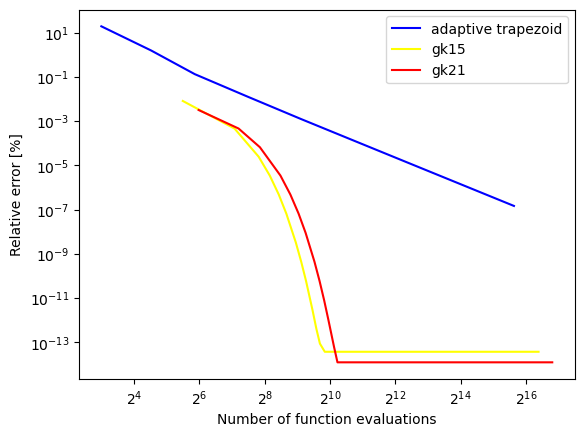

In [16]:
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="blue")
plt.plot(gk15_eval, gk15_error, label="gk15", color="yellow")
plt.plot(gk21_eval, gk21_error, label="gk21", color="red")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 3** - wykres błędu względnego dla trzech metod całkowania w zależności od ilości ewaluacji funkcji.

## Powtórzenie obliczeń z Laboratorium 6

In [17]:
def midpoint(x, y):
    dx = x[1] - x[0]
    return sum([y[i] * dx for i in range(len(y))])

In [18]:
# do not run unless completely necessary
midpoint_error = []
trapz_error = []
simpson_error = []
for m in range(1, 22):
    base = np.linspace(start=0, stop=1, num=2**m+1)
    xs = np.array([(base[i] + base[i-1])/2 for i in range(1, len(base))])
    ys = np.array([f(x) for x in xs])
    bys = np.array([f(x) for x in base])
    midpoint_error.append((abs(midpoint(xs, ys) - REF) / -REF) * 100)
    trapz_error.append((abs(spi.trapezoid(x=base, y=bys) - REF) / -REF) * 100)
    simpson_error.append((abs(spi.simpson(x=base, y=bys) - REF) / -REF) * 100)

Maksymalna wartość $m$ została zmniejszona z $25$ do $21$ ze względu na zbyt długi czas obliczeń dla największych wartości.

In [19]:
def gauss_quad(f, xs, ws):
    t = lambda x: 0.5*x + 0.5
    res = 0
    for x, w in zip(xs, ws):
        res += f(t(x)) * w
    return 0.5*res

In [20]:
error = []
for n in range(1, 513):
    xs, ws = sps.roots_legendre(n)
    error.append((abs(gauss_quad(f, xs, ws) - REF) / -REF) * 100)

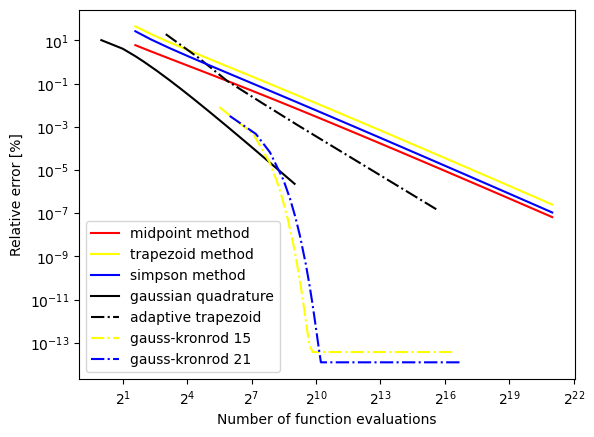

In [21]:
nodes = 1 + 2**np.array([i for i in range(1, 22)])
plt.plot(nodes, midpoint_error, label="midpoint method", color="red")
plt.plot(nodes, trapz_error, label="trapezoid method", color="yellow")
plt.plot(nodes, simpson_error, label="simpson method", color="blue", zorder=3)
plt.plot(range(1, 513), error, label="gaussian quadrature", color="black")
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="black", linestyle="-.")
plt.plot(gk15_eval, gk15_error, label="gauss-kronrod 15", color="yellow", linestyle="-.")
plt.plot(gk21_eval, gk21_error, label="gauss-kronrod 21", color="blue", linestyle="-.")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 4** - wykres wspólny dla metod z Laboratorium 6 oraz Laboratorium 7

## Zadanie 2b

Zadanie polega na obliczeniu całki  
$$\int_{0}^{1}\frac{1}{(x-0.3)^2+0.001}+\frac{1}{(x-0.9)^2+0.004}-6dx$$
za pomocą adaptacyjnej metody trapezów oraz kwadratury Gaussa - Kronroda. Otrzymane wyniki należy porównać z wynikiem właściwym, który wynosi  
$$\frac{1}{\sqrt{0.001}}\left(\arctan{\frac{0.7}{\sqrt{0.001}}}+\arctan{\frac{0.3}{\sqrt{0.001}}}\right)+\frac{1}{\sqrt{0.004}}\left(\arctan{\frac{0.1}{\sqrt{0.004}}}+\arctan{\frac{0.9}{\sqrt{0.004}}}\right)-6$$

In [22]:
def f(x):
    return (1 / ((x - 0.3)**2 + 0.001)) + (1 / ((x - 0.9)**2 + 0.004)) - 6

REF = (1/np.sqrt(0.001)) * (np.arctan(0.7 / np.sqrt(0.001)) + np.arctan((0.3 / np.sqrt(0.001)))) + (1/np.sqrt(0.004)) * (np.arctan(0.1 / np.sqrt(0.004)) + np.arctan(0.9 / np.sqrt(0.004))) - 6

- `f` - $f(x)$ - całkowana funkcja
- `REF` - wartość referencyjna

## Adaptacyjna metoda trapezów

In [23]:
trapz_eval = []
ad_trapz_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="trapezoid", full_output=True)
    trapz_eval.append(info.neval)
    ad_trapz_error.append((abs(REF - res) / REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 79.8073049657269
Result for tolerance 10^-1: 90.65521390608268
Result for tolerance 10^-2: 128.3408021469201
Result for tolerance 10^-3: 128.25281246629305
Result for tolerance 10^-4: 128.24504586401252
Result for tolerance 10^-5: 128.24424753887288
Result for tolerance 10^-6: 128.2441591056333
Result for tolerance 10^-7: 128.24415353734065
Result for tolerance 10^-8: 128.24415353734065
Result for tolerance 10^-9: 128.24415353734065
Result for tolerance 10^-10: 128.24415353734065
Result for tolerance 10^-11: 128.24415353734065
Result for tolerance 10^-12: 128.24415353734065
Result for tolerance 10^-13: 128.24415353734065
Result for tolerance 10^-14: 128.24415353734065


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (15 punktów)

In [24]:
gk15_eval = []
gk15_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk15", full_output=True)
    gk15_eval.append(info.neval)
    gk15_error.append((abs(REF - res) / REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 128.24416942491953
Result for tolerance 10^-1: 128.24415027248813
Result for tolerance 10^-2: 128.24415027248813
Result for tolerance 10^-3: 128.24415027248813
Result for tolerance 10^-4: 128.24415027229261
Result for tolerance 10^-5: 128.24415027241952
Result for tolerance 10^-6: 128.24415027241952
Result for tolerance 10^-7: 128.24415027241957
Result for tolerance 10^-8: 128.2441502724197
Result for tolerance 10^-9: 128.2441502724197
Result for tolerance 10^-10: 128.2441502724197
Result for tolerance 10^-11: 128.2441502724197
Result for tolerance 10^-12: 128.2441502724197
Result for tolerance 10^-13: 128.2441502724197
Result for tolerance 10^-14: 128.2441502724197


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

## Metoda Gaussa-Kronroda (21 punktów)

In [25]:
gk21_eval = []
gk21_error = []
for i in range(15):
    res, _, info = spi.quad_vec(f, 0, 1, epsrel=10**(-i), quadrature="gk21", full_output=True)
    gk21_eval.append(info.neval)
    gk21_error.append((abs(REF - res) / REF) * 100)
    print(f"Result for tolerance 10^-{i}: {res}")

Result for tolerance 10^-0: 128.2441503972061
Result for tolerance 10^-1: 128.2441503972061
Result for tolerance 10^-2: 128.2441503140153
Result for tolerance 10^-3: 128.2441502724199
Result for tolerance 10^-4: 128.2441502724199
Result for tolerance 10^-5: 128.2441502724199
Result for tolerance 10^-6: 128.2441502724199
Result for tolerance 10^-7: 128.2441502724199
Result for tolerance 10^-8: 128.2441502724197
Result for tolerance 10^-9: 128.2441502724197
Result for tolerance 10^-10: 128.2441502724197
Result for tolerance 10^-11: 128.2441502724197
Result for tolerance 10^-12: 128.2441502724197
Result for tolerance 10^-13: 128.2441502724197
Result for tolerance 10^-14: 128.2441502724197


Wyniki obliczeń dla tolerancji względnej $10^{-i},i=0,...,-14$

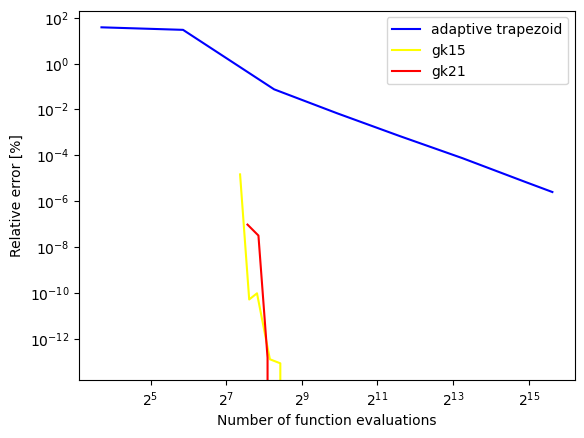

In [26]:
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="blue")
plt.plot(gk15_eval, gk15_error, label="gk15", color="yellow")
plt.plot(gk21_eval, gk21_error, label="gk21", color="red")
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 5** - wykres błędu względnego dla trzech metod całkowania w zależności od ilości ewaluacji funkcji.

## Powtórzenie obliczeń z Laboratorium 6

In [27]:
def midpoint(x, y):
    dx = x[1] - x[0]
    return sum([y[i] * dx for i in range(len(y))])

In [28]:
# do not run unless completely necessary
midpoint_error = []
trapz_error = []
simpson_error = []
for m in range(1, 22):
    base = np.linspace(start=0, stop=1, num=2**m+1)
    xs = np.array([(base[i] + base[i-1])/2 for i in range(1, len(base))])
    ys = f(xs)
    bys = f(base)
    midpoint_error.append((abs(midpoint(xs, ys) - REF) / REF) * 100)
    trapz_error.append((abs(spi.trapezoid(x=base, y=bys) - REF) / REF) * 100)
    simpson_error.append((abs(spi.simpson(x=base, y=bys) - REF) / REF) * 100)

Maksymalna wartość $m$ została zmniejszona z $25$ do $21$ ze względu na zbyt długi czas obliczeń dla największych wartości.

In [29]:
def gauss_quad(f, xs, ws):
    t = lambda x: 0.5*x + 0.5
    res = 0
    for x, w in zip(xs, ws):
        res += f(t(x)) * w
    return 0.5*res

In [30]:
error = []
for n in range(1, 513):
    xs, ws = sps.roots_legendre(n)
    error.append((abs(gauss_quad(f, xs, ws) - REF) / REF) * 100)

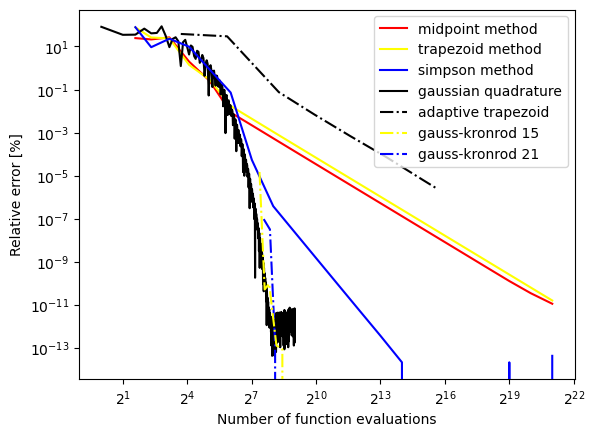

In [31]:
nodes = 1 + 2**np.array([i for i in range(1, 22)])
plt.plot(nodes, midpoint_error, label="midpoint method", color="red")
plt.plot(nodes, trapz_error, label="trapezoid method", color="yellow")
plt.plot(nodes, simpson_error, label="simpson method", color="blue", zorder=3)
plt.plot(range(1, 513), error, label="gaussian quadrature", color="black")
plt.plot(trapz_eval, ad_trapz_error, label="adaptive trapezoid", color="black", linestyle="-.")
plt.plot(gk15_eval, gk15_error, label="gauss-kronrod 15", color="yellow", linestyle="-.", zorder=5)
plt.plot(gk21_eval, gk21_error, label="gauss-kronrod 21", color="blue", linestyle="-.", zorder=4)
plt.yscale("log")
plt.xscale("log", base=2)
plt.xlabel("Number of function evaluations")
plt.ylabel("Relative error [%]")
plt.legend()
plt.show()

**Wyk. 6** - wspólny wykres dla metod z Laboratorium 6 i Laboratorium 7

# Wnioski

Najdokładniejszą metodą liczenia całek są kwadratury Gaussa. Kwadratura Gauss - Legendre jest lepsza pod względem dokładności od adaptacyjnej metody trapezów dla zbliżonych liczby ewaluacji. Kwadratury Gauss - Kronrod dla każdej z funkcji okazały się najdokładniejsze.